In [39]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


In [69]:
import pandas as pd

def get_data(sheet_name):
    worksheet = gc.open(sheet_name).sheet1
    rows = worksheet.get_all_values()
    df = pd.DataFrame.from_records(rows)
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df = df.reset_index(drop=True)
    return df

sheets = ['Viewerage', 'Subscriptionsource', 'Sharingservice','Geography','Cities']
dfs = {}

for sheet in sheets:
    dfs[sheet] = get_data(sheet)


In [70]:
a = dfs['Viewerage']
b = dfs['Subscriptionsource']
c = dfs['Sharingservice']
d = dfs['Geography']
e = dfs['Cities']

## a a = dfs['Viewerage']

In [51]:
a

,Viewer age,Views (%),Average view duration,Average percentage viewed (%),Watch time (hours) (%)
0,13–17 years,5.71,0:00:12,101.02,6.1
1,18–24 years,31.32,0:00:11,95.26,30.86
2,25–34 years,27,0:00:12,102.87,28.41
3,35–44 years,18.18,0:00:11,92.57,17.55
4,45–54 years,10.04,0:00:11,92.39,9.52
5,55–64 years,4.69,0:00:11,95.85,4.58
6,65+ years,3.04,0:00:11,102.46,2.98


In [56]:
# Find the age group with the highest views
print(a[a['Views (%)'] == a['Views (%)'].max()]['Viewer age'])

# Find the age group with the longest watch time
print(a[a['Watch time (hours) (%)'] == a['Watch time (hours) (%)'].max()]['Viewer age'])


0    13–17 years
Name: Viewer age, dtype: object
4    45–54 years
Name: Viewer age, dtype: object


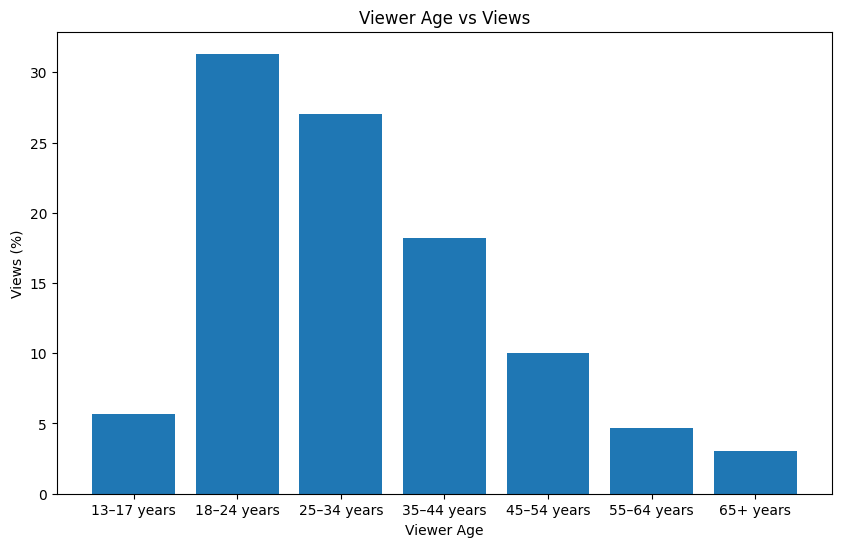

In [58]:
import matplotlib.pyplot as plt

# Ensure the 'Viewer age' column is of type string, and the 'Views (%)' column is of type float
a['Viewer age'] = a['Viewer age'].astype(str)
a['Views (%)'] = a['Views (%)'].astype(float)

plt.figure(figsize=(10, 6))
plt.bar(a['Viewer age'], a['Views (%)'])

plt.title('Viewer Age vs Views')
plt.xlabel('Viewer Age')
plt.ylabel('Views (%)')

# Show the plot
plt.show()

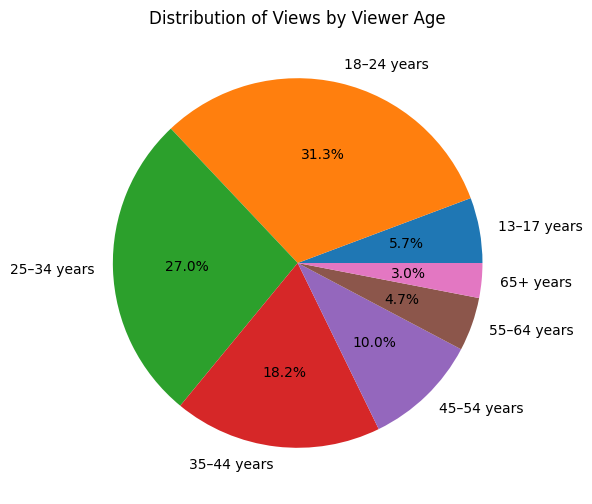

In [60]:
import matplotlib.pyplot as plt

# Ensure the 'Views (%)' column is of type float
a['Views (%)'] = a['Views (%)'].astype(float)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(a['Views (%)'], labels = a['Viewer age'], autopct='%1.1f%%')

# Add title
plt.title('Distribution of Views by Viewer Age')

# Show the plot
plt.show()

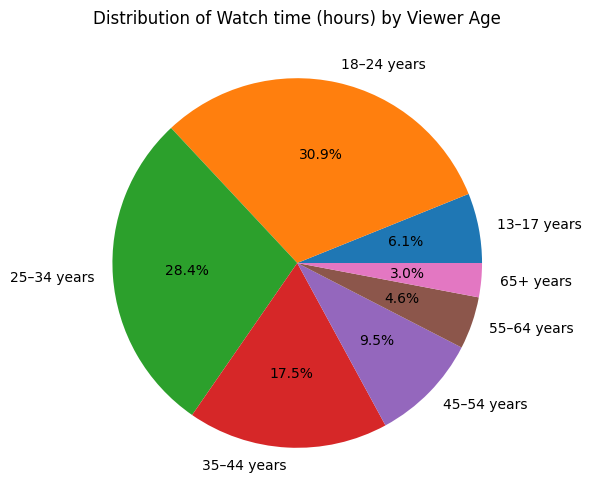

In [61]:
a['Watch time (hours) (%)'] = a['Watch time (hours) (%)'].astype(float)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(a['Watch time (hours) (%)'], labels = a['Viewer age'], autopct='%1.1f%%')

# Add title
plt.title('Distribution of Watch time (hours) by Viewer Age')

# Show the plot
plt.show()

## b = dfs['Subscriptionsource']

In [62]:
b

,Subscription source,Subscribers,Subscribers gained,Subscribers lost
0,Total,110,150,40
1,Shorts feed,122,123,1
2,YouTube watch page,5,6,1
3,Your YouTube channel,4,7,3
4,YouTube search,4,4,0
5,Subscriptions feed,-1,0,1
6,Closed accounts,-2,0,2
7,Subscriptions channel list,-3,0,3
8,Other,-22,7,29


In [63]:
c

,Sharing service,Shares
0,Total,153
1,WhatsApp,47
2,Copy to Clipboard,31
3,Text Message,26
4,Other,14
5,Facebook Messenger,9
6,Facebook,4
7,Gmail,3
8,Share to Snapchat,3
9,Directly via system share dialog,3


In [68]:
d

,Geography,Views,Watch time (hours),Average view duration
0,Total,98238,339.8772,0
1,US,28718,100.0485,0
2,IN,7620,22.2684,0
3,DE,3895,11.6436,0
4,GB,3830,11.4552,0
...,...,...,...,...
95,DO,0,0,0
96,HN,0,0,0
97,KE,0,0,0
98,SV,0,0,0


In [66]:
def convert_to_seconds(time_str):
    if len(time_str.split(':')) == 2:
        m, s = time_str.split(':')
        return int(m) * 60 + int(s)
    else:
        return 0

d['Average view duration'] = d['Average view duration'].apply(convert_to_seconds)


In [74]:
d.head(100)

,Geography,Views,Watch time (hours),Average view duration
0,Total,98238,339.8772,0:00:12
1,US,28718,100.0485,0:00:12
2,IN,7620,22.2684,0:00:10
3,DE,3895,11.6436,0:00:10
4,GB,3830,11.4552,0:00:10
...,...,...,...,...
95,DO,0,0,
96,HN,0,0,
97,KE,0,0,
98,SV,0,0,
